In [1]:
cd ..

/home/sam/cc-net


/home/sam/anaconda3/envs/primal-dual/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import graphlearning as gl
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import torch
import scipy.sparse as sp
from scipy.sparse import coo_matrix, triu

from tqdm.notebook import tqdm

In [43]:
def visualize_clusters(X, U, ax, point_size=8, label="Clustered data"):
    """Plot the loss curve and a grayscale scatter of the smoothed solution U."""
    fig = plt.figure(figsize=(10,4))
    ax.scatter(X[:, 0], X[:, 1], s=8, edgecolors='none', alpha=0.5, label='original data')
    ax.scatter(U[:,0].cpu(), U[:,1].cpu(), s=point_size, alpha=0.9, c='0.4', label=label)

In [29]:
import yaml
import models.models as models
import losses.losses as losses
import datasets.datasets as datasets

exp_file = 'configs/single-runs/best-pdhg-sbm.yaml'
with open(exp_file, "r") as f:
    exp_cfg = yaml.safe_load(f)


In [30]:
model_config = exp_cfg['model_config']
model_config['cfg']['in_node_dim'] = 2
model_config['cfg']['in_edge_dim'] = 2


In [94]:
model_class = getattr(models, model_config['model'])
model = model_class(**model_config['cfg'])
model = model.float()

model_pth = '/data/sam/primal-dual/energy_pdg/gaussian_sbm_dataset/EncodeProcessDecode/GraphPDHGNet/PDHGLayer_L8_H128_inN32_inE32_lam0.1_tau0.35_sig0.35_resid=False_steps=1_featDim=2/ityts1o2/final.pt'
model_state = torch.load(model_pth)


In [95]:
model.load_state_dict(model_state)

<All keys matched successfully>

In [96]:
datapth = '/data/sam/primal-dual/data/gaussian_sbm_dataset_n_graphs=1_n_nodes=200_n_clusters=2_p_in=0.1_p_out=0.001_feature_dim=2_seed=42-train.pt'
dataset = torch.load(datapth)

In [97]:
data = dataset[0]

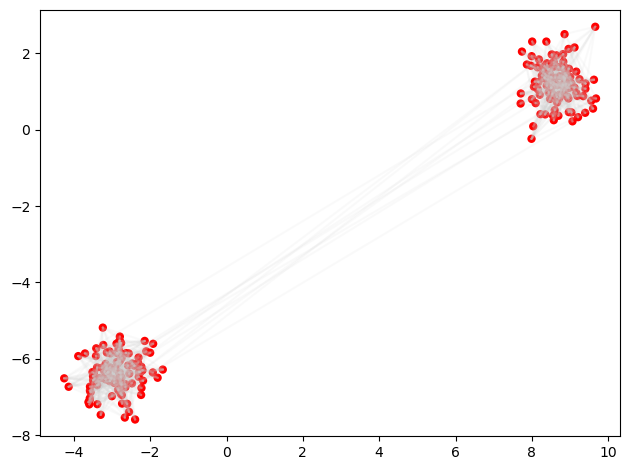

In [98]:
X = data.x
w= data.edge_attr
edge_index = data.edge_index
"""plot data points """


"""plot edges """
wmax = w.max()
for i, j in zip(edge_index[0], edge_index[1]):
   plt.plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color='0.8', alpha=0.1) 
plt.scatter(X[:, 0], X[:, 1], edgecolors='none', color='red')
plt.axis('equal'); plt.tight_layout(); plt.show()

In [99]:
src = data.edge_index[0]
dst = data.edge_index[1]
e_init = data.x[src] - data.x[dst]
h, e = model(h=data.x.float(),
                     e=e_init.float(), 
                     edge_index = data.edge_index, 
                     w=data.edge_attr,
                     x=data.x.float())

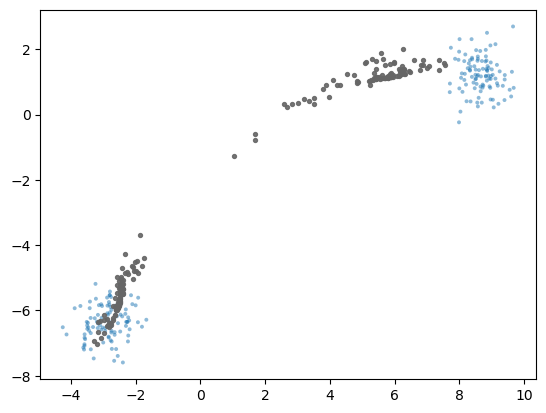

<Figure size 1000x400 with 0 Axes>

In [100]:
fig, ax = plt.subplots()
h = h.detach()
visualize_clusters(data.x, h, ax)